In [5]:
# Dependencies
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import twitter_api as ta
from pprint import pprint

# Twitter API Keys
consumer_key = ta.consumer_key
consumer_secret = ta.consumer_secret
access_token = ta.access_token
access_token_secret = ta.access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
# Target User
target_user = "realdonaldtrump"

# Create a list to record all date-times of tweets
tweet_times = []

# Loop through 500 tweets
for x in range(25):
    
    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user, page=x)
    
    for tweet in public_tweets:
        tweet_times.append(tweet['created_at'])
        

# Confirm tweet counts

len(tweet_times)

500

In [14]:
# Create a list to hold datetime objects

# Add each datetime object into the array
print(tweet_times)

['Sat Mar 17 17:34:21 +0000 2018', 'Sat Mar 17 17:11:50 +0000 2018', 'Sat Mar 17 15:00:54 +0000 2018', 'Sat Mar 17 04:08:02 +0000 2018', 'Fri Mar 16 17:42:07 +0000 2018', 'Fri Mar 16 16:27:06 +0000 2018', 'Fri Mar 16 14:40:53 +0000 2018', 'Fri Mar 16 01:49:47 +0000 2018', 'Thu Mar 15 23:10:56 +0000 2018', 'Thu Mar 15 17:47:50 +0000 2018', 'Thu Mar 15 17:47:34 +0000 2018', 'Thu Mar 15 13:29:25 +0000 2018', 'Thu Mar 15 11:11:39 +0000 2018', 'Thu Mar 15 04:31:47 +0000 2018', 'Wed Mar 14 23:49:09 +0000 2018', 'Wed Mar 14 22:36:12 +0000 2018', 'Wed Mar 14 21:25:58 +0000 2018', 'Wed Mar 14 21:20:42 +0000 2018', 'Wed Mar 14 14:37:36 +0000 2018', 'Wed Mar 14 13:54:50 +0000 2018', 'Sat Mar 17 17:34:21 +0000 2018', 'Sat Mar 17 17:11:50 +0000 2018', 'Sat Mar 17 15:00:54 +0000 2018', 'Sat Mar 17 04:08:02 +0000 2018', 'Fri Mar 16 17:42:07 +0000 2018', 'Fri Mar 16 16:27:06 +0000 2018', 'Fri Mar 16 14:40:53 +0000 2018', 'Fri Mar 16 01:49:47 +0000 2018', 'Thu Mar 15 23:10:56 +0000 2018', 'Thu Mar 15 1

In [21]:
# Calculate the time between tweets
time_in_between = []

# Calculate the time in between each tweet, then append the difference to the list
# Hint: use a construction like the following: for x in range(len(tweet_time_objects)-1):
# Hint: subtract the next item on the list from the current one, at position x
for x in range(len(tweet_times)-1):
    converted_time1 = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
    converted_time2 = datetime.strptime(tweet_times[x+1], "%a %b %d %H:%M:%S %z %Y")
    diff = converted_time1 - converted_time2
    time_in_between.append(diff.seconds/3600)
    

# Hours Between Tweets
print("Avg. Hours Between Tweets: %s" % np.mean(time_in_between))

Avg. Hours Between Tweets: 3.47082442663


In [22]:
time_in_between

[0.37527777777777777,
 2.1822222222222223,
 10.88111111111111,
 10.431944444444444,
 1.2502777777777778,
 1.7702777777777778,
 12.851666666666667,
 2.6475,
 5.385,
 0.0044444444444444444,
 4.3025,
 2.296111111111111,
 6.664444444444444,
 4.710555555555556,
 1.2158333333333333,
 1.1705555555555556,
 0.08777777777777777,
 6.718333333333334,
 0.7127777777777777,
 20.34138888888889,
 0.37527777777777777,
 2.1822222222222223,
 10.88111111111111,
 10.431944444444444,
 1.2502777777777778,
 1.7702777777777778,
 12.851666666666667,
 2.6475,
 5.385,
 0.0044444444444444444,
 4.3025,
 2.296111111111111,
 6.664444444444444,
 4.710555555555556,
 1.2158333333333333,
 1.1705555555555556,
 0.08777777777777777,
 6.718333333333334,
 0.7127777777777777,
 0.7113888888888888,
 0.1661111111111111,
 12.4575,
 0.14583333333333334,
 2.0425,
 6.935555555555555,
 0.04861111111111111,
 0.7855555555555556,
 1.8783333333333334,
 0.275,
 11.643333333333333,
 3.6041666666666665,
 6.493333333333333,
 0.5236111111111111

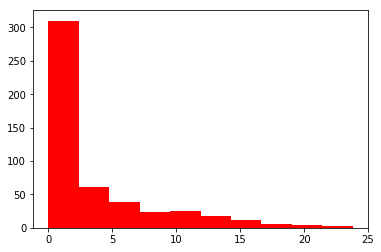

In [30]:
# Use MatPlotLib to plot the time between Tweets
plt.hist(time_in_between, color='red')
plt.show()